# Introduccion

- Prepara un prototipo de un modelo de machine learning. La empresa desarrolla soluciones de eficiencia para la industria pesada.
1. El modelo debe predecir la cantidad de oro extraído del mineral de oro. Dispones de los datos de extracción y purificación.
2. El modelo ayudará a optimizar la producción y a eliminar los parámetros no rentables.
- Tendrás que:
1. preparar los datos;
2. realizar el análisis de datos;
3. desarrollar un modelo y entrenarlo.
- Para completar el proyecto, puedes utilizar la documentación de pandas, matplotlib y sklearn.

# Contenido
* [1. Introducción]
* [2. Contenidos]
* [3. Inicialización]
    * [3.1 Cargar las librerias]
    * [3.2 Cargar los datos]
* [4. Generacion de modelos]
    * [4.1 Segmentacion de datos]
    * [4.2 Entrenamiento de modelos]
    * [4.3 Guardar las predicciones]
    * [4.4 Mostrar RECM y Volumen promedio]
    * [4.5 Analisis del mejor modelo]
* [5. Calculo de ganancias]

# Inicializacion

## Cargar las librerias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, r2_score, roc_auc_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer

## Cargar los datos

In [ ]:
test_df = pd.read_csv('/datasets/gold_recovery_test.csv', parse_dates=['date'])
train_df = pd.read_csv('/datasets/gold_recovery_train.csv', parse_dates=['date'])
full_df = pd.read_csv('/datasets/gold_recovery_full.csv', parse_dates=['date'])

In [ ]:
display(test_df.shape)
display(train_df.shape)
display(full_df.shape)

(5856, 53)

(16860, 87)

(22716, 87)

In [ ]:
# Imprimiremos la informacion por separado de cada dataframe
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5856 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5554 non-null   float64       
 2   primary_cleaner.input.depressant            5572 non-null   float64       
 3   primary_cleaner.input.feed_size             5856 non-null   float64       
 4   primary_cleaner.input.xanthate              5690 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64       
 9   primary_

In [ ]:
# Informacion para el dataframe de entrenamiento
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16860 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16788 non-null  float64       
 2   final.output.concentrate_pb                         16788 non-null  float64       
 3   final.output.concentrate_sol                        16490 non-null  float64       
 4   final.output.concentrate_au                         16789 non-null  float64       
 5   final.output.recovery                               15339 non-null  float64       
 6   final.output.tail_ag                                16794 non-null  float64       
 7   final.output.tail_pb                                16677 non-null  float64       
 8   final.

In [ ]:
# Informacion para el dataframe completo
print(full_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                22716 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         22627 non-null  float64       
 2   final.output.concentrate_pb                         22629 non-null  float64       
 3   final.output.concentrate_sol                        22331 non-null  float64       
 4   final.output.concentrate_au                         22630 non-null  float64       
 5   final.output.recovery                               20753 non-null  float64       
 6   final.output.tail_ag                                22633 non-null  float64       
 7   final.output.tail_pb                                22516 non-null  float64       
 8   final.

In [ ]:
# Comprobacion del calculo de recuperacion
def calculate_recovery(c, f, t):
    """Calcula la recuperación de una característica"""
    recovery = ((c*(f-t))/(f*(c-t)))*100
    return recovery

# Calcular la recuperación para rougher.output.recovery
c = train_df['rougher.output.concentrate_au']
f = train_df['rougher.input.feed_au']
t = train_df['rougher.output.tail_au']
train_df['rougher.output.recovery_calc'] = calculate_recovery(c, f, t)

# Calcular el EAM para la característica rougher.output.recovery
recovery_real = train_df['rougher.output.recovery']
recovery_calc = train_df['rougher.output.recovery_calc']
eam = abs(recovery_real - recovery_calc).mean()
print('El EAM para rougher.output.recovery es:', eam)

El EAM para rougher.output.recovery es: 9.303415616264301e-15


## Muestra de los datos

In [ ]:
# Primeros 5 resultados del dataframe de prueba
test_df.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [ ]:
# Primeros 5 resultados del dataframe de entrenamiento
train_df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery_calc
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794


In [ ]:
# Primeros 5 resultados del dataframe completo
full_df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


### Caracteristicas no disponibles en el df de prueba
- final.output.concentrate_ag
- final.output.concentrate_pb
- final.output.concentrate_sol
- final.output.concentrate_au
- final.output.recovery
- secondary_cleaner.output.tail_ag
- secondary_cleaner.output.tail_pb
- secondary_cleaner.output.tail_sol
- secondary_cleaner.output.tail_au
- secondary_cleaner.state.floatbank2_a_air
- secondary_cleaner.state.floatbank2_a_level
- secondary_cleaner.state.floatbank2_b_air
- secondary_cleaner.state.floatbank2_b_level
- secondary_cleaner.state.floatbank3_a_air
- secondary_cleaner.state.floatbank3_a_level
- secondary_cleaner.state.floatbank3_b_air
- secondary_cleaner.state.floatbank3_b_level
- secondary_cleaner.state.floatbank4_a_air
- secondary_cleaner.state.floatbank4_a_level
- secondary_cleaner.state.floatbank4_b_air
- secondary_cleaner.state.floatbank4_b_level
- secondary_cleaner.state.floatbank5_a_air
- secondary_cleaner.state.floatbank5_a_level
- secondary_cleaner.state.floatbank5_b_air
- secondary_cleaner.state.floatbank5_b_level
- secondary_cleaner.state.floatbank6_a_air
- secondary_cleaner.state.floatbank6_a_level
1. Estas caracteristicas son del tipo output, esto indica que se miden después de que se haya realizado el proceso de recuperación de minerales. Por lo tanto, estas características no están disponibles en el conjunto de prueba ya que solo se miden en el proceso de producción real.

# Analisis de datos

## Valores ausentes

In [ ]:
# Imputacion de valores ausentes con metodo de interpolacion para el conjunto de prueba
print(test_df.isna().sum())
test_df = test_df.interpolate(method='linear', limit_direction='forward', axis=0)

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [ ]:
# Imputacion de valores ausentes con metodo de interpolacion para el conjunto de entrenamiento
print(train_df.isna().sum())
train_df = train_df.interpolate(method='linear', limit_direction='forward', axis=0)

date                                             0
final.output.concentrate_ag                     72
final.output.concentrate_pb                     72
final.output.concentrate_sol                   370
final.output.concentrate_au                     71
                                              ... 
secondary_cleaner.state.floatbank5_b_air        85
secondary_cleaner.state.floatbank5_b_level      84
secondary_cleaner.state.floatbank6_a_air       103
secondary_cleaner.state.floatbank6_a_level      85
rougher.output.recovery_calc                  2283
Length: 88, dtype: int64


In [ ]:
# Imputacion de valores ausentes con metodo de interpolacion para el conjunto de entrenamiento
print(full_df.isna().sum())
full_df = full_df.interpolate(method='linear', limit_direction='forward', axis=0)

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64


In [ ]:
display(test_df.isna().sum())
display(train_df.isna().sum())
display(full_df.isna().sum())

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
rougher.output.recovery_calc                  0
Length: 88, dtype: int64

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [ ]:
full_df['rougher.output.recovery'] = full_df['rougher.output.recovery'].astype(np.float64)

## Mapa de calor

In [ ]:
# Creamos un dataframe con las columnas que nos interesan
columns_of_interest = ['final.output.recovery', 'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 'rougher.input.feed_size', 'rougher.input.feed_rate', 'rougher.input.floatbank11_xanthate', 'rougher.output.recovery', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_au']
df_correlation = train_df[columns_of_interest]

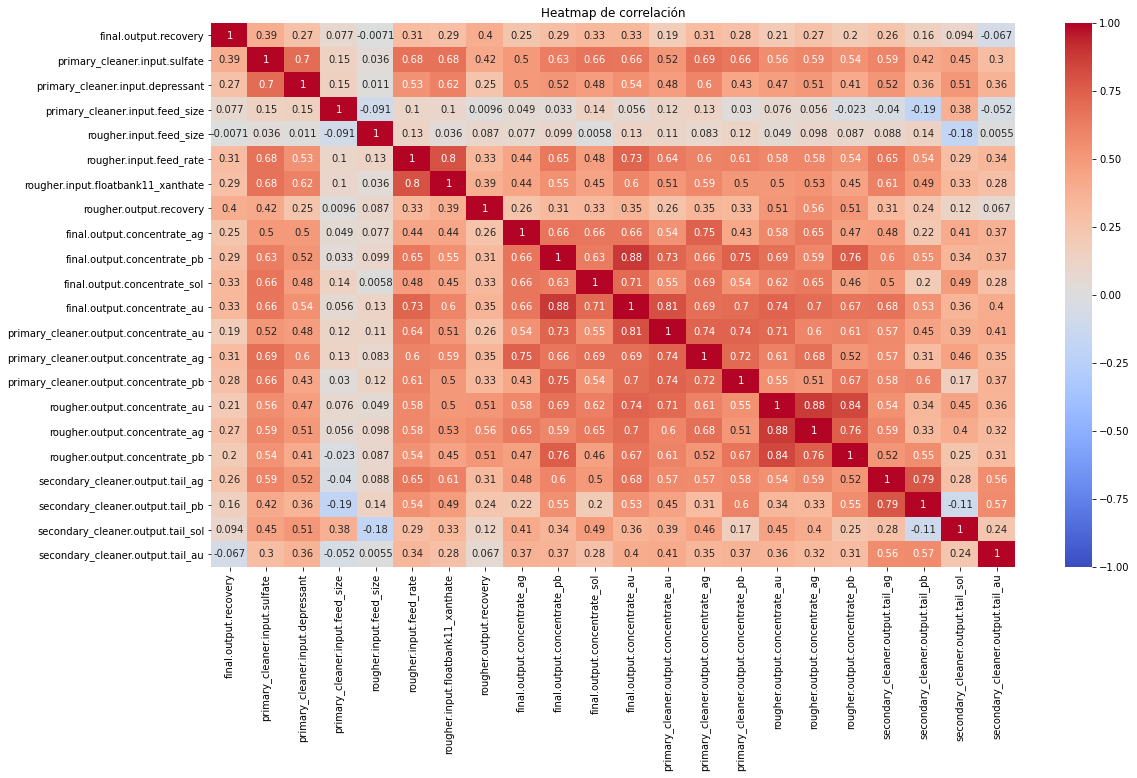

In [ ]:
# Creamos el heatmap de correlación
corr = df_correlation.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap de correlación')
plt.show()

- Se puede concluir que la correlacion entre variables es bastante alta excepto en las etapas iniciales del proceso y en la secundaria.

## Concentracion de metales

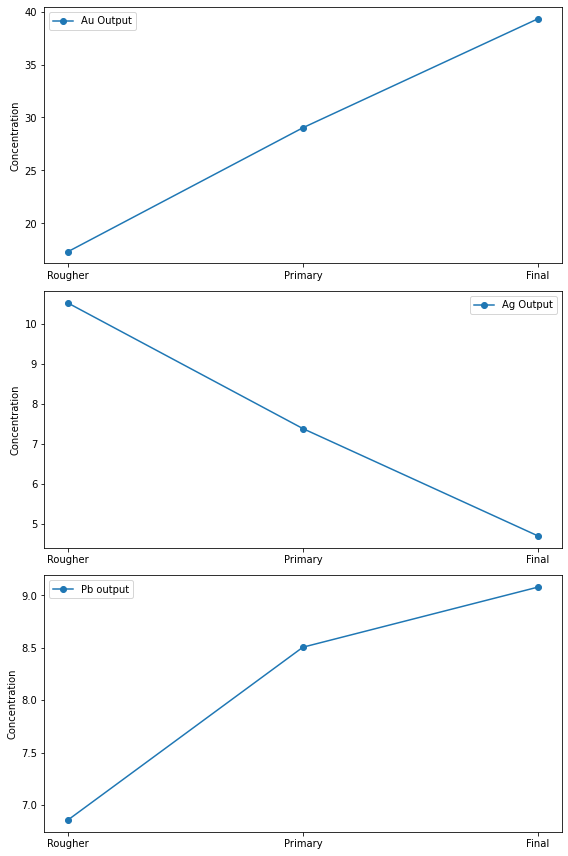

In [ ]:
# Seleccionar las columnas de concentración de metales en las diferentes etapas de purificación
output_au = ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']
output_ag = ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']
output_pb = ['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']

# Graficar la evolución de la concentración de cada metal en función de la etapa de purificación
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
axs[0].plot(train_df[output_au].mean(axis=0), 'o-', label='Au Output')
axs[1].plot(train_df[output_ag].mean(axis=0), 'o-', label='Ag Output')
axs[2].plot(train_df[output_pb].mean(axis=0), 'o-', label='Pb output')
for i in range(3):
    axs[i].set_xticks(range(len(output_au)))
    axs[i].set_xticklabels(['Rougher', 'Primary', 'Final'])
    axs[i].set_ylabel('Concentration')
    axs[i].legend()
plt.tight_layout()
plt.show()

- Como podemos observar las concentraciones de oro van en aumento conforme van pasando las etapas lo cual era de esperarse debido a que el proceso consiste en extraer oro, seguido por el grafico de plata en el cual vemos una clara disminucion de las concentraciones y finalmente para el plomo al igual que en la concentracion del oro va en aumento.

## Distribuciones del tamaño de particulas de alimentacion

In [ ]:
# Tamaño de partículas de alimentación
train_feed_size = train_df['rougher.input.feed_size']
test_feed_size = test_df['rougher.input.feed_size']

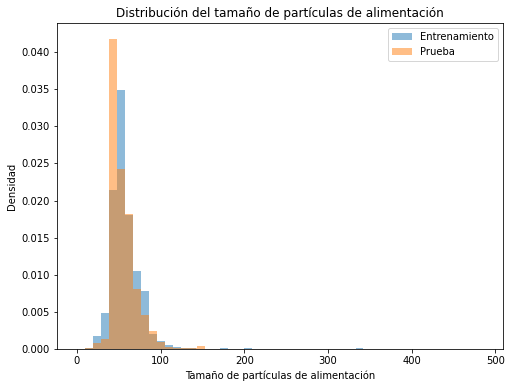

In [ ]:
# Graficar las distribuciones de tamaño de partículas de alimentación
plt.figure(figsize=(8, 6))
plt.hist(train_feed_size, bins=50, density=True, alpha=0.5, label='Entrenamiento')
plt.hist(test_feed_size, bins=50, density=True, alpha=0.5, label='Prueba')
plt.xlabel('Tamaño de partículas de alimentación')
plt.ylabel('Densidad')
plt.title('Distribución del tamaño de partículas de alimentación')
plt.legend()
plt.show()

- Podemos observar que para el conjunto de entrenamiento hay algunos valores atipicos, pero en terminos generales ambas distribuciones se asemejan, por consiguiente podemos continuar con el analisis.

<AxesSubplot:>

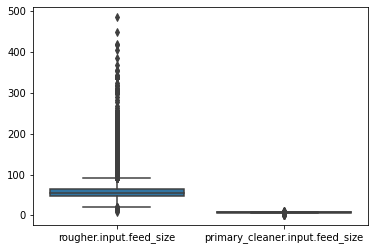

In [ ]:
sns.boxplot(data=train_df[['rougher.input.feed_size', 'primary_cleaner.input.feed_size']])

<AxesSubplot:>

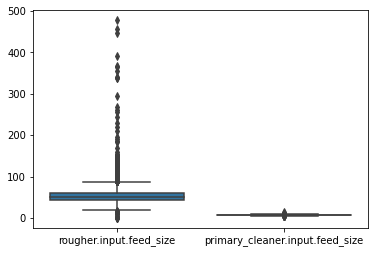

In [ ]:
sns.boxplot(data=test_df[['rougher.input.feed_size', 'primary_cleaner.input.feed_size']])

- Con estos boxplots podemos ver que las distribuciones para el conjunto de entrenamiento y de prueba son bastante similares, por consiguiente podemos intuir que los valores se pueden considerar "normales" asi que podemos proseguir.

## Concentraciones totales en diferentes etapas


In [ ]:
# Se juntan todas las concentraciones en nuevas columnas para el conjunto de entrenamiento.
# Para la etapa "materia prima"
train_df['input_total'] = train_df['rougher.input.feed_au'] + train_df['rougher.input.feed_ag'] + train_df['rougher.input.feed_pb'] + train_df['rougher.input.feed_sol']
test_df['input_total'] = test_df['rougher.input.feed_au'] + test_df['rougher.input.feed_ag'] + test_df['rougher.input.feed_pb'] + test_df['rougher.input.feed_sol']

# Para la etapa "concentrado rougher"
train_df['rougher_total'] = train_df['rougher.output.concentrate_au'] + train_df['rougher.output.concentrate_ag'] + train_df['rougher.output.concentrate_pb'] + train_df['rougher.output.concentrate_sol']

# Para la etapa "concentrado final"
train_df['final_total'] = train_df['final.output.concentrate_au'] + train_df['final.output.concentrate_ag'] + train_df['final.output.concentrate_pb'] + train_df['final.output.concentrate_sol']

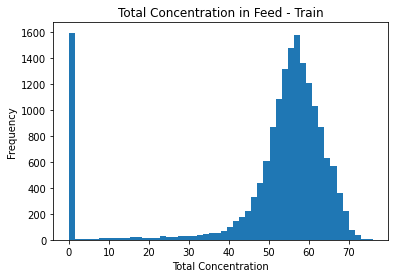

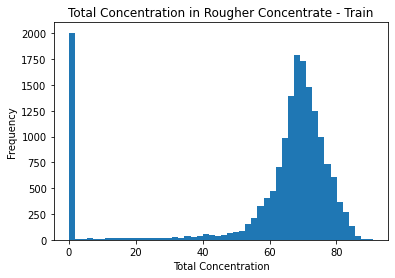

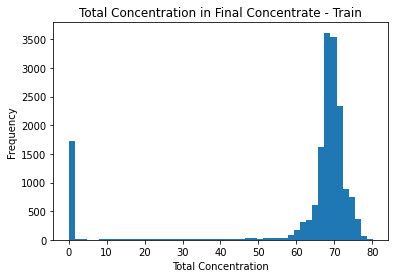

In [ ]:
# Se hacen histogramas para ver las distribuciones de las concentraciones para el conjunto de entrenamiento
plt.hist(train_df['input_total'], bins=50)
plt.title('Total Concentration in Feed - Train')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.show()

plt.hist(train_df['rougher_total'], bins=50)
plt.title('Total Concentration in Rougher Concentrate - Train')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.show()

plt.hist(train_df['final_total'], bins=50)
plt.title('Total Concentration in Final Concentrate - Train')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.show()

- Como podemos observar en estos 3 graficos las concentraciones totales en las diferentes etapas tienen una distribucion bastante similar, con la mayoria teniendo frecuencias altas cercanas a 0 o siendo 0.

## Eliminacion de anomalias

In [ ]:
# Eliminar valores anómalos del conjunto de entrenamiento
train_df = train_df[train_df['input_total'] > 30]
train_df = train_df[train_df['rougher_total'] > 30]
train_df = train_df[train_df['final_total'] > 30]

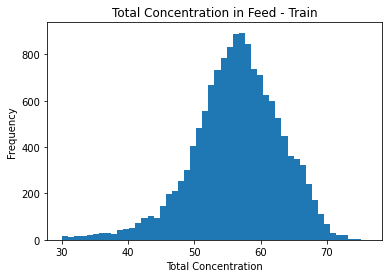

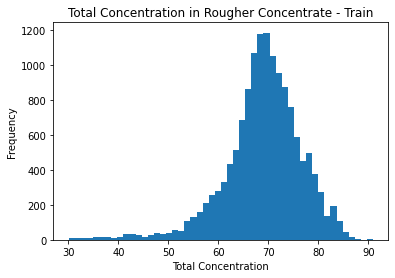

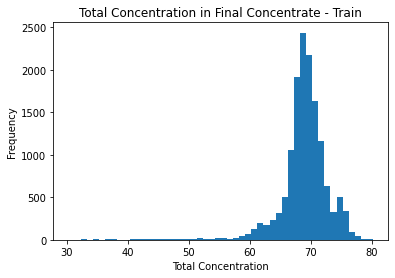

In [ ]:
# Se hacen histogramas para ver las distribuciones de las concentraciones para el conjunto de entrenamiento sin valores anomalos
plt.hist(train_df['input_total'], bins=50)
plt.title('Total Concentration in Feed - Train')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.show()

plt.hist(train_df['rougher_total'], bins=50)
plt.title('Total Concentration in Rougher Concentrate - Train')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.show()

plt.hist(train_df['final_total'], bins=50)
plt.title('Total Concentration in Final Concentrate - Train')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.show()

- Ya sin los valores anomalos tenemos distribuciones mas normales para todos los conjuntos de valores, decidi eliminar valores de manera pareja para que no exista un sesgo dependiente de la etapa en la que se este realizando.

# Modelos

In [ ]:
# Se elimina cualquier dato infinito que se contenga en el dataframe de entrenamiento
train_df = train_df.replace([np.inf, -np.inf], np.nan)
train_df = train_df.dropna()

In [ ]:
# Se divide en objetivo y caracteristicas
train_df['date'] = pd.to_numeric(train_df['date'])
features_final = train_df.drop(['final.output.recovery'], axis=1)
features_rougher = train_df.drop(['rougher.output.recovery'], axis=1)
target_rougher = train_df['rougher.output.recovery']
target_final = train_df['final.output.recovery']

In [ ]:
# Entrenar modelos de regresion lineal para la etapa rougher
model_linear = LinearRegression()
scores = cross_val_score(model_linear, features_rougher, target_rougher, cv=5, scoring='neg_mean_absolute_error')
scores = -scores
# Imprimir las puntuaciones de cada partición
print("Scores Linear Regression for rougher:", scores)

# Calcular el promedio de las puntuaciones
mean_score = scores.mean()
print("Mean Score Linear Regression for rougher:", mean_score)

Scores Linear Regression for rougher: [4.01643596 4.55510103 5.20273558 5.80383456 1.84513301]
Mean Score Linear Regression for rougher: 4.284648028274051


In [ ]:
# Entrenar modelos de bosque aleatorio para la etapa rougher
model_rf = RandomForestRegressor(random_state=123)
scores_rf_rougher = cross_val_score(model_rf, features_rougher, target_rougher, cv=5, scoring='neg_mean_absolute_error')

scores_rf_rougher = -scores_rf_rougher
# Imprimir las puntuaciones de cada partición
print("Scores bosque aleatorio rougher:", scores_rf_rougher)

# Calcular el promedio de las puntuaciones
mean_score_rf_rougher = scores_rf_rougher.mean()
print("Mean Score Random Forest for rougher:", mean_score_rf_rougher)

Scores: [0.18096679 0.03710182 0.04484326 0.11245982 0.19778104]
Mean Score Random Forest for rougher: 0.11463054622426846


In [ ]:
# Entrenar modelos de regresion lineal para la etapa final
scores_final_lr = cross_val_score(model_linear, features_final, target_final, cv=5, scoring='neg_mean_absolute_error')
scores_final_lr = -scores_final_lr
# Imprimir las puntuaciones de cada partición
print("Scores regresion lineal final:", scores_final_lr)

# Calcular el promedio de las puntuaciones
mean_score_final_lr = scores_final_lr.mean()
print("Mean Score Linear Regression for final:", mean_score_final_lr)

Scores: [5.68788027 4.86989484 6.91012985 5.42775322 5.69701049]
Mean Score Linear Regression for rougher: 5.718533734506588


In [ ]:
# Entrenar modelos de bosque aleatorio para la etapa final
scores_rf_final = cross_val_score(model_rf, features_final, target_final, cv=5, scoring='neg_mean_absolute_error')
scores_rf_final = -scores_rf_final
# Imprimir las puntuaciones de cada partición
print("Scores bosque aleatorio final:", scores_rf_final)

# Calcular el promedio de las puntuaciones
mean_score_rf_final = scores_rf_final.mean()
print("Mean Score Random forest final:", mean_score_rf_final)

Scores bosque aleatorio final: [2.6455046  1.89394285 1.57298778 1.6582253  2.30566096]
Mean Score Random forest final: 2.0152642971733403


In [ ]:
# Función para calcular el sMAPE
def calculate_smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

In [ ]:
# Etapa Rougher - Regresión Lineal
smape_rougher_linear = cross_val_score(model_linear, features_rougher, target_rougher, cv=3, scoring=make_scorer(calculate_smape))
mean_sMAPE_rlr = smape_rougher_linear.mean()
print("sMAPE Linear Regression for rougher:", smape_rougher_linear)
print("Promedio Linear Regression for rougher:", mean_sMAPE_rlr)

sMAPE Linear Regression for rougher: [10.41189105  7.0815841   7.56002086]
mean Linear Regression for rougher: 8.3511653347705


In [ ]:
# Etapa Rougher - Bosque Aleatorio
smape_rougher_rf = cross_val_score(model_rf, features_rougher, target_rougher, cv=3, scoring=make_scorer(calculate_smape))
mean_sMAPE_rfr = smape_rougher_rf.mean()
print("sMAPE Random Forest for rougher:", smape_rougher_rf)
print("Promedio Random Forest for rougher:", mean_sMAPE_rfr)

sMAPE Random Forest for rougher: [0.35953063 0.04657771 0.58253372]
Promedio Random Forest for rougher: 0.32954735209948055


In [ ]:
# Etapa Final - Regresión Lineal
smape_final_linear = cross_val_score(model_linear, features_final, target_final, cv=3, scoring=make_scorer(calculate_smape))
mean_sMAPE_flr = smape_final_linear.mean()
print("sMAPE Linear Regression for final:", smape_final_linear)
print("Promedio Linear Regression for final:", mean_sMAPE_flr)

sMAPE Linear Regression for final: [ 9.15212078 11.89686582 15.62898362]
Promedio Linear Regression for final: 12.225990074098933


In [ ]:
# Etapa Final - Bosque Aleatorio
smape_final_rf = cross_val_score(model_rf, features_final, target_final, cv=3, scoring=make_scorer(calculate_smape))
mean_sMAPE_frf = smape_final_rf.mean()
print("sMAPE Random Forest for final:", smape_final_rf)
print("Promedio Random Forest for final:", mean_sMAPE_frf)

sMAPE Random Forest for final: [4.1296947  3.66292303 7.10950682]
Promedio Random Forest for final: 4.967374849167627


In [ ]:
# Calcular sMAPE total
smape_total_lr = 0.25 * smape_rougher_linear + 0.75 * smape_final_linear
smape_total_rf = 0.25 * smape_rougher_rf + 0.75 * smape_final_rf

In [ ]:
# Imprimir los resultados
print("sMAPE Total - Linear Regression:", smape_total_lr)
print('Promedio Total - Linear Regression', smape_total_lr.mean())
print("sMAPE Total - Random Forest:", smape_total_rf)
print('Promedio Total - Random Forest:', smape_total_rf.mean())

sMAPE Total - Linear Regression: [ 9.46706335 10.69304539 13.61174293]
Promedio Total - Linear Regression 11.257283889266825
sMAPE Total - Random Forest: [3.18715368 2.7588367  5.47776355]
Promedio Total - Random Forest: 3.8079179749005903


# Conclusiones

- Como conclusion final podemos observar que el mejor modelo es un random forest regressor dandonos el sMAPE mas chico tanto en rougher, final y total. Entonces para el mejor modelo tenemos que un bosque aleatorio nos da los mejores resultados tanto evaluandolo con MAE como con sMAPE.